In [23]:
import cv2
import matplotlib.pyplot as plt
import array

Original Dimensions :  (377, 272, 3)


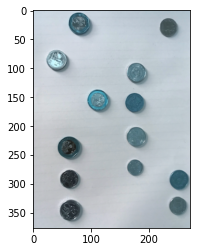

In [24]:
#Load and plot image
img = cv2.imread('coins.png')
print('Original Dimensions : ',img.shape)
plt.imshow(img)

In [25]:
# Resize the image
resized = cv2.resize(img, (500,660), interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)

Resized Dimensions :  (660, 500, 3)


In [26]:
#Preprocess the image and find contours
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [12]:
#Initialise a list to store the centers of each coin
r=2
c=30
mat = [[0 for x in range(r)] for y in range(c)]
print(mat)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [27]:
#Identify the centers (x,y) of each coin and store them in a list
c=0
for i in range(len(contours)):
    if cv2.contourArea(contours[i]) > 600.0:
        (x,y),radius = cv2.minEnclosingCircle(contours[i])
        center = (int(x),int(y))
        radius = int(radius)
        mat[c][0]=int(x)
        mat[c][1]=int(y)
        c = c + 1
        cv2.circle(resized,center,radius,(0,255,0),3)
print(mat)

[[249, 329], [121, 607], [461, 592], [465, 513], [118, 513], [325, 476], [117, 418], [329, 384], [324, 281], [209, 275], [329, 191], [80, 158], [431, 52], [149, 41], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


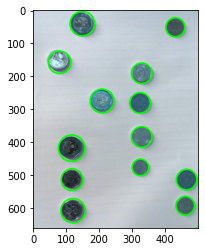

In [28]:
#Plot the image with coin borders drawn
plt.imshow(resized)

In [15]:
#Map the center points to defined points
for i in range(0,c):
    a = 0
    b = 50
    d = 25
    flag = 0
    while flag is 0:
        if (mat[i][0] >= a) & (mat[i][0] < b):
            mat[i][0] = d
            flag = 1
            break
        else:
            a = a+50
            b = b+50
            d = d+50

In [16]:
print(mat)

[[225, 329], [125, 607], [475, 592], [475, 513], [125, 513], [325, 476], [125, 418], [325, 384], [325, 281], [225, 275], [325, 191], [75, 158], [425, 52], [125, 41], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [18]:
arr = [0] * 10
count = [0] * 10
a = 25
for i in range(0, 10):
    arr[i]  = a
    a = a +50
print(arr)


[25, 75, 125, 175, 225, 275, 325, 375, 425, 475]


In [20]:
for j in range(0,len(count)):
    for i in range(0,c):
        if mat[i][0] == arr[j]:
            count[j] = count[j] +1
            
print(count)

[0, 2, 8, 0, 4, 0, 8, 0, 2, 4]


In [21]:
for i in range(0,10):
    if count[i]>1:
        cv2.line(resized, (arr[i], 50), (arr[i], 600), (255, 0, 0), 5)

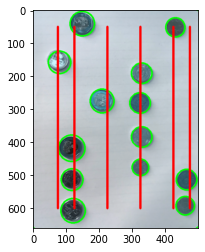

In [22]:
plt.imshow(resized)